In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
#Load the file
df = pd.read_csv('Telecom_customer_churn.csv')

#Main definition problem here are the attrition rates of the existing customers.
# Aim here is to analyze the factors that can lead to customer churn hence to reduce that we are requiredto build a predictive model.



In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Here out target variable is the churn rate.
df.shape

(7043, 21)

In [9]:
df.columns.values #just to cjeck the number of columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
#Check the data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#Check the statistics of number variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# 75% Customer have actually less than 55 months of tenure.
Avg monthly cahrges are around 64.76 USD while 25% of customers pay more than 89.95 USD
We have to understand what is the churners ratio

In [13]:
df['Churn'].value_counts() # Its an imbalanced dataset

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
#Summary of the data as it has too many features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df_telecom_data = df.copy()

In [16]:
#Total charges should be in numeric amounts so lets convert it into numeric values
df_telecom_data.TotalCharges = pd.to_numeric(df_telecom_data.TotalCharges, errors = 'coerce')
df_telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#Lets check yhe null values of telecom data
df_telecom_data.loc[df_telecom_data['TotalCharges'].isnull() ==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
#Since the number of missing values is very low so we can ignore them
#Removing the missing values
df_telecom_data.dropna(how = 'any', inplace = True)

In [20]:
#We can also divide tenure into groups for a better understanding
print(df_telecom_data['tenure'].max()) #It is 72 months

72


In [22]:
# Group the tenure by intervals of 12 months
labels = ["{0} - {1}".format(i,i + 11) for i in range(1,72,12)]

df_telecom_data['tenure_group'] = pd.cut(df_telecom_data.tenure, range(1,80,12), right = False, labels=labels)

In [23]:
df_telecom_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [24]:
# Since tenure group is created we can drop the tenure column
df_telecom_data.drop(columns= ['customerID', 'tenure'], axis= 1, inplace = True)
df_telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


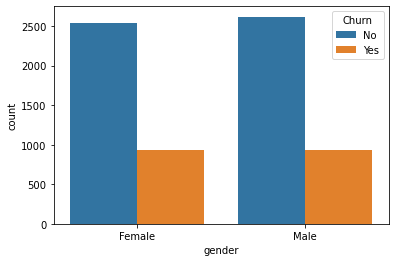

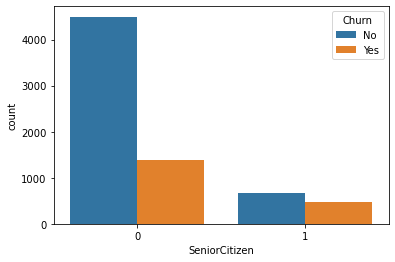

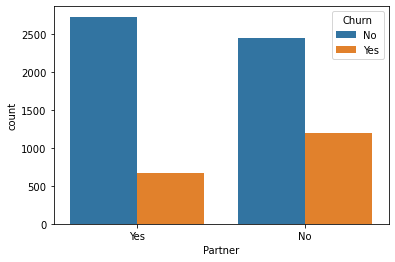

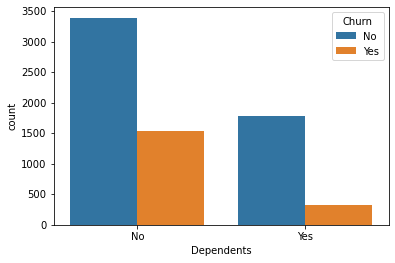

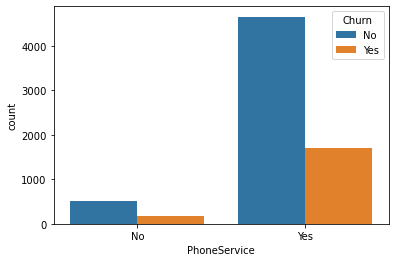

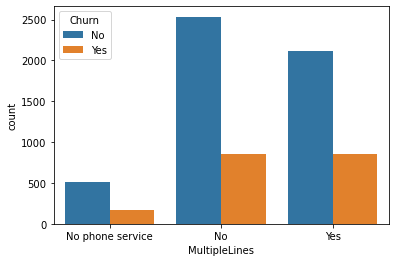

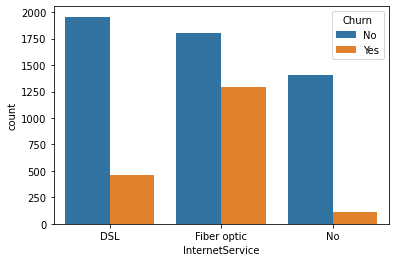

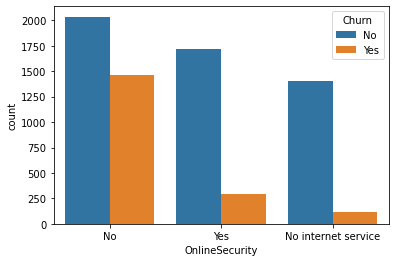

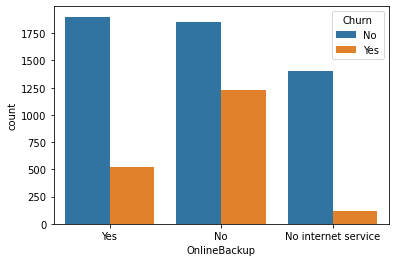

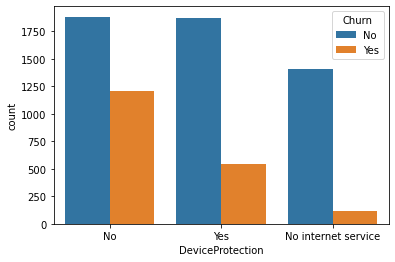

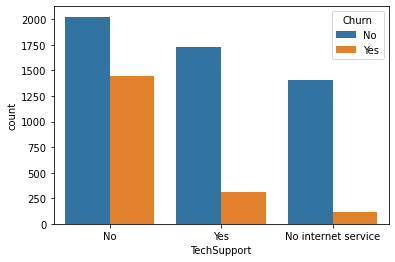

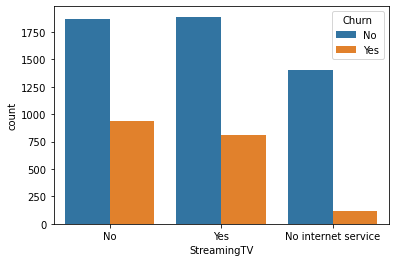

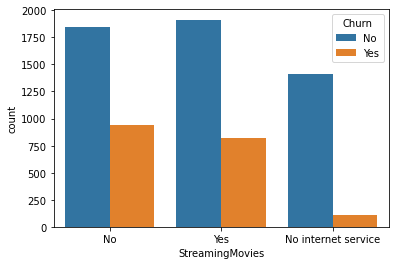

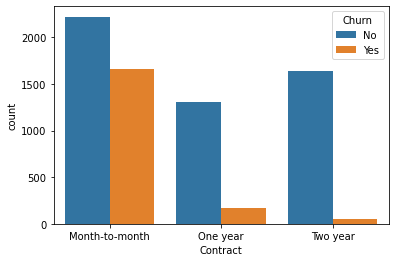

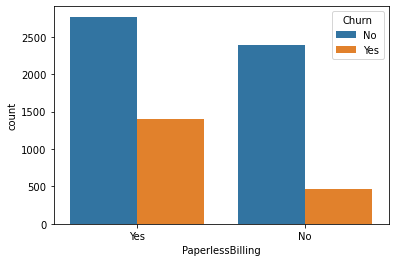

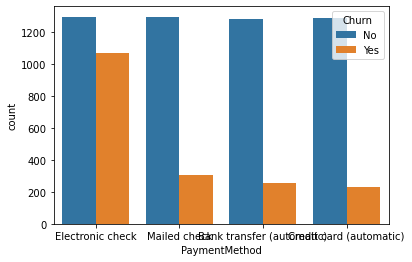

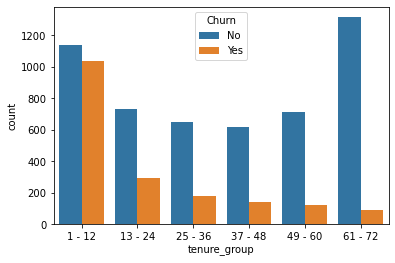

In [26]:
# EDA by applying for loop
for i, predictor in enumerate(df_telecom_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data= df_telecom_data, x=predictor, hue='Churn')

In [27]:
#Now convert churn into numeric variable
df_telecom_data['Churn'] = np.where(df_telecom_data.Churn == 'Yes', 1,0)

In [28]:
#Convert all the categorical variables into numerical variables
df_telecom_data_dummies = pd.get_dummies(df_telecom_data)
df_telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [29]:
import warnings
warnings.filterwarnings('ignore')

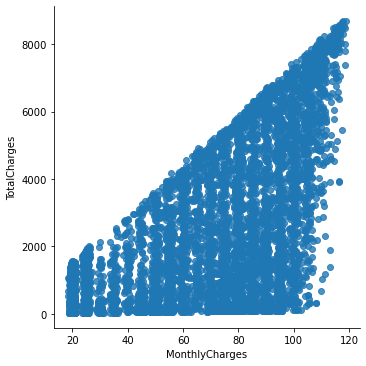

In [31]:
#Relationship between monthly charges and total charges
sns.lmplot(data= df_telecom_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

#Total Charges increase as monthly charges increase hence, it is highly correlated

<AxesSubplot:>

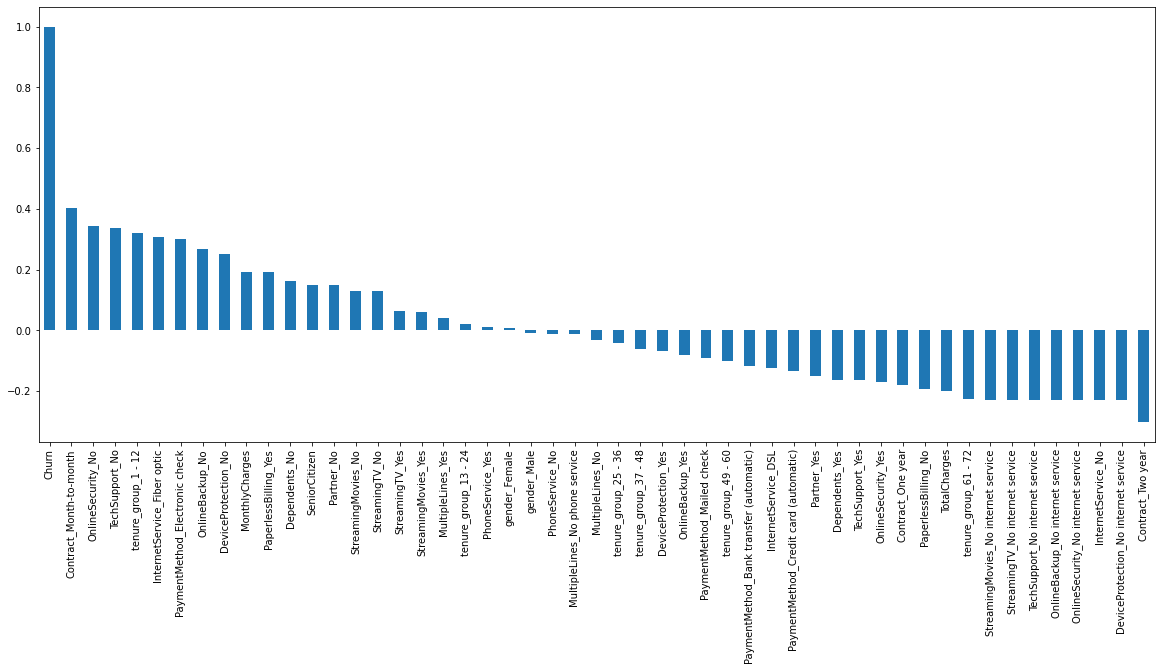

In [33]:
#Build a correlation matrix with all predictors with churn
plt.figure(figsize=(20,8))
df_telecom_data_dummies.corr()['Churn'].sort_values(ascending= False).plot(kind='bar')

#High Churn seen in case of month to month contratct

<AxesSubplot:>

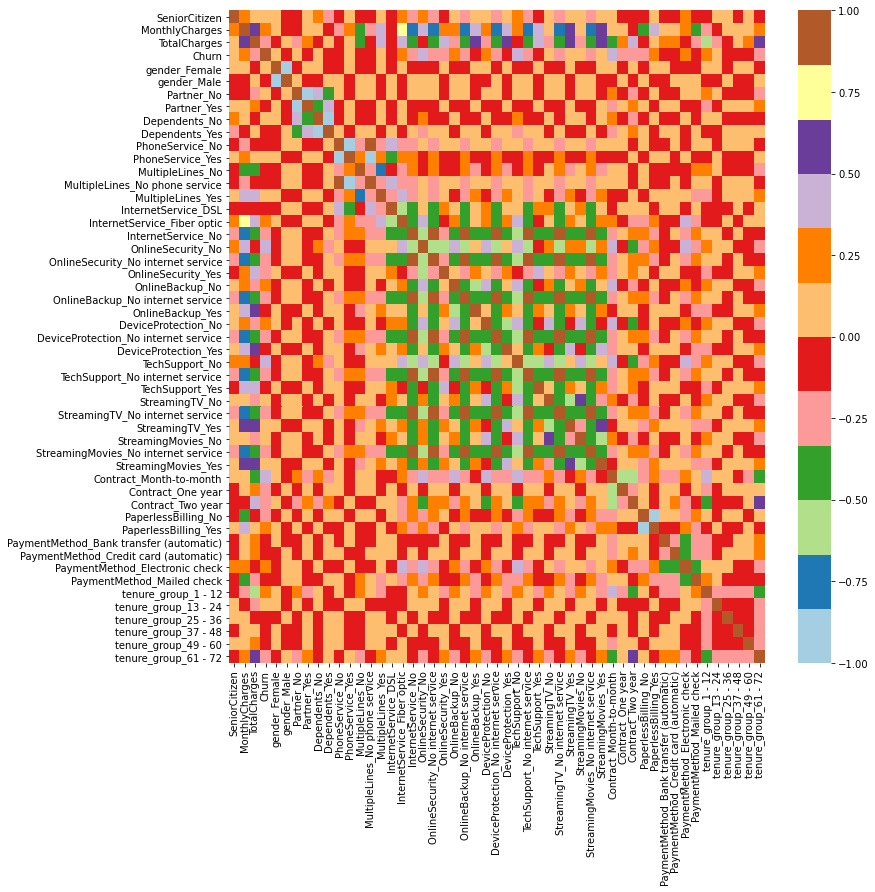

In [35]:
plt.figure(figsize= (12,12))
sns.heatmap(df_telecom_data_dummies.corr(), cmap= "Paired")

In [36]:
new_df1_target0 = df_telecom_data.loc[df_telecom_data["Churn"]==0]
new_df1_target1 = df_telecom_data.loc[df_telecom_data["Churn"]==1]

In [38]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 22
    plt.rcParams["axes.titlepad"] = 30
                  
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')
                  
    plt.show()

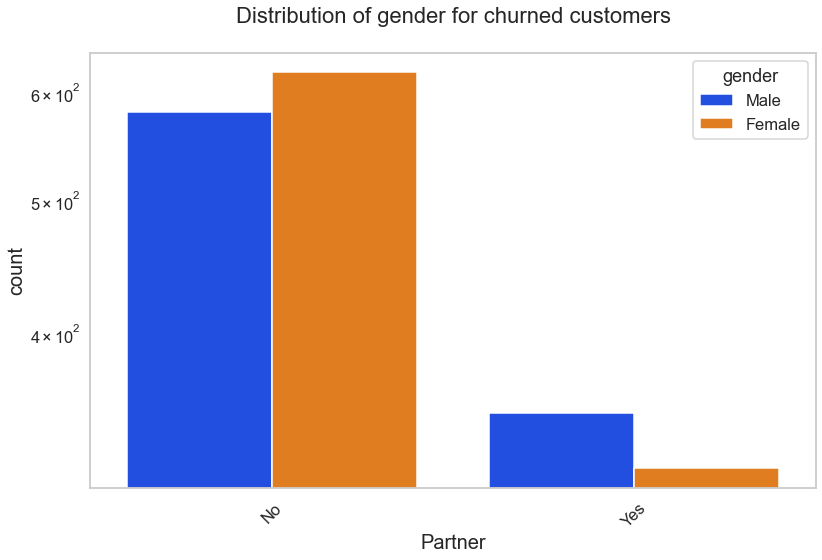

In [39]:
uniplot(new_df1_target1, col= 'Partner', title = 'Distribution of gender for churned customers', hue='gender')

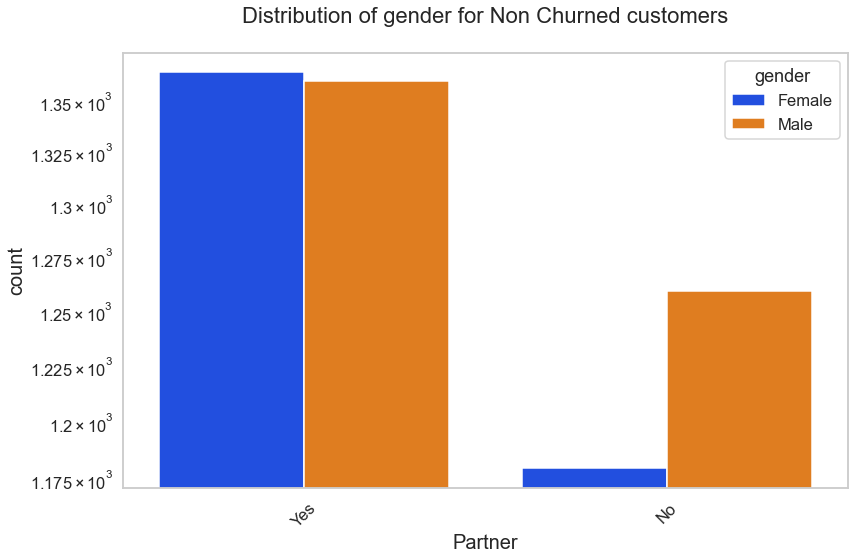

In [40]:
uniplot(new_df1_target0, col= 'Partner', title = 'Distribution of gender for Non Churned customers', hue='gender')

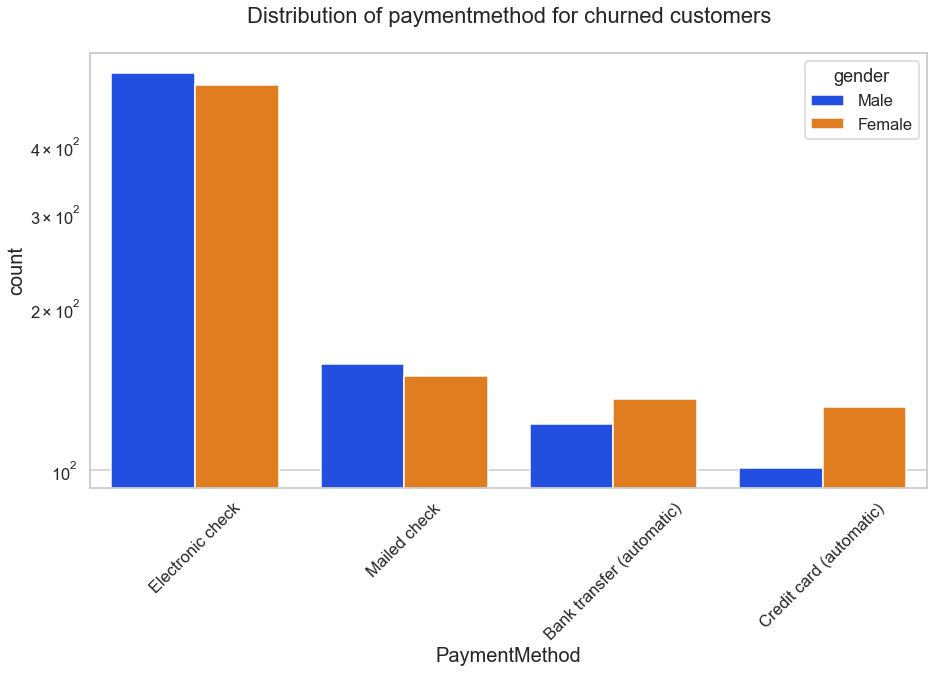

In [41]:
uniplot(new_df1_target1, col= 'PaymentMethod', title = 'Distribution of paymentmethod for churned customers', hue='gender')

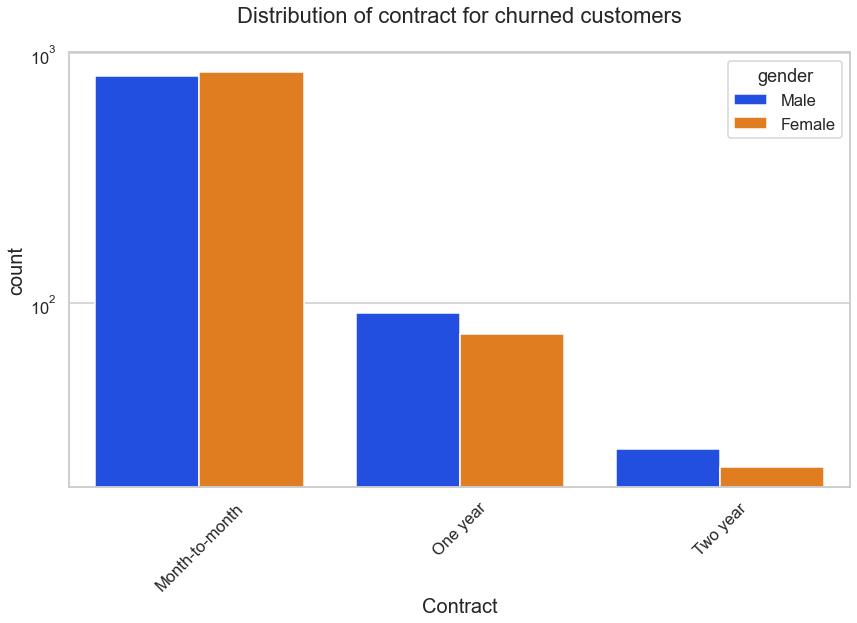

In [42]:
uniplot(new_df1_target1, col= 'Contract', title = 'Distribution of contract for churned customers', hue='gender')

In [ ]:
Conclusion
Non senior citizens are high churners
Month-to-month churners are the maximum

In [43]:
df_telecom_data_dummies.to_csv('telecom_churn.csv') #Stored the dummies for testing

In [44]:
#Model building stage
#import the required libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [46]:
from imblearn.combine import SMOTEENN

In [47]:
df = pd.read_csv('telecom_churn.csv')

In [48]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [49]:
df = df.drop('Unnamed: 0', axis=1)

In [50]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [52]:
# Model building stage
X = df.drop('Churn', axis=1)
print(X)

      SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85              1            0   
1                 0           56.95       1889.50              0            1   
2                 0           53.85        108.15              0            1   
3                 0           42.30       1840.75              0            1   
4                 0           70.70        151.65              1            0   
...             ...             ...           ...            ...          ...   
7027              0           84.80       1990.50              0            1   
7028              0          103.20       7362.90              1            0   
7029              0           29.60        346.45              1            0   
7030              1           74.40        306.60              0            1   
7031              0          105.65       6844.50              0            1   

      Partner_No  Partner_Y

In [53]:
y = df['Churn']
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64


In [61]:
#Now we can train and test the sample
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

###Decision Tree Classifier

In [56]:
dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [58]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [60]:
y_pred = dt.predict(X_test)

In [62]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
print(confusion_matrix(y_test, y_pred))

[[915 123]
 [181 188]]


In [64]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1038
           1       0.60      0.51      0.55       369

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



#Now the precision score and recall scaore is very low as the model has an imbalanced dataset

In [65]:
sm = SMOTEENN() #A function used for over and under sampling
X_resampled, y_resampled = sm.fit_sample(X,y)

In [66]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [67]:
dt_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [68]:
dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [69]:
#prediction
y_pred_smote = dt_smote.predict(xr_test)

In [70]:
print(classification_report(yr_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       513
           1       0.93      0.95      0.94       651

    accuracy                           0.93      1164
   macro avg       0.93      0.93      0.93      1164
weighted avg       0.93      0.93      0.93      1164



In [76]:
#Try it for Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8 )

In [78]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(X,y)

In [79]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [80]:
rf_smote = RandomForestClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [81]:
rf_smote.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [83]:
y_pred_smote_rf = rf_smote.predict(xr_test)

In [84]:
print(classification_report(yr_test, y_pred_smote_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       535
           1       0.93      0.96      0.94       632

    accuracy                           0.93      1167
   macro avg       0.94      0.93      0.93      1167
weighted avg       0.94      0.93      0.93      1167



In [85]:
print(confusion_matrix(yr_test, y_pred_smote_rf))

[[486  49]
 [ 27 605]]


Hence, the accuracy of the model is 93%